Import some prerequisites

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [3]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.

    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.

    Returns:
        (tuple): tuple of two point of line.
    '''

    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# part b


Implement this function to detect and remove circles in the given image.

In [43]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect circles using the Hough Transform
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=45, param2=40, minRadius=0, maxRadius=0)

    # If circles are detected
    if circles is not None:
        # Convert the circles to integer coordinates
        circles = np.round(circles[0, :]).astype("int")

        # Loop over the detected circles
        for (x, y, r) in circles:
            cv2.circle(out_img, (x, y), r + 2, (0, 0, 0), -1)

    return out_img

Test your implementation (dont change this cell)

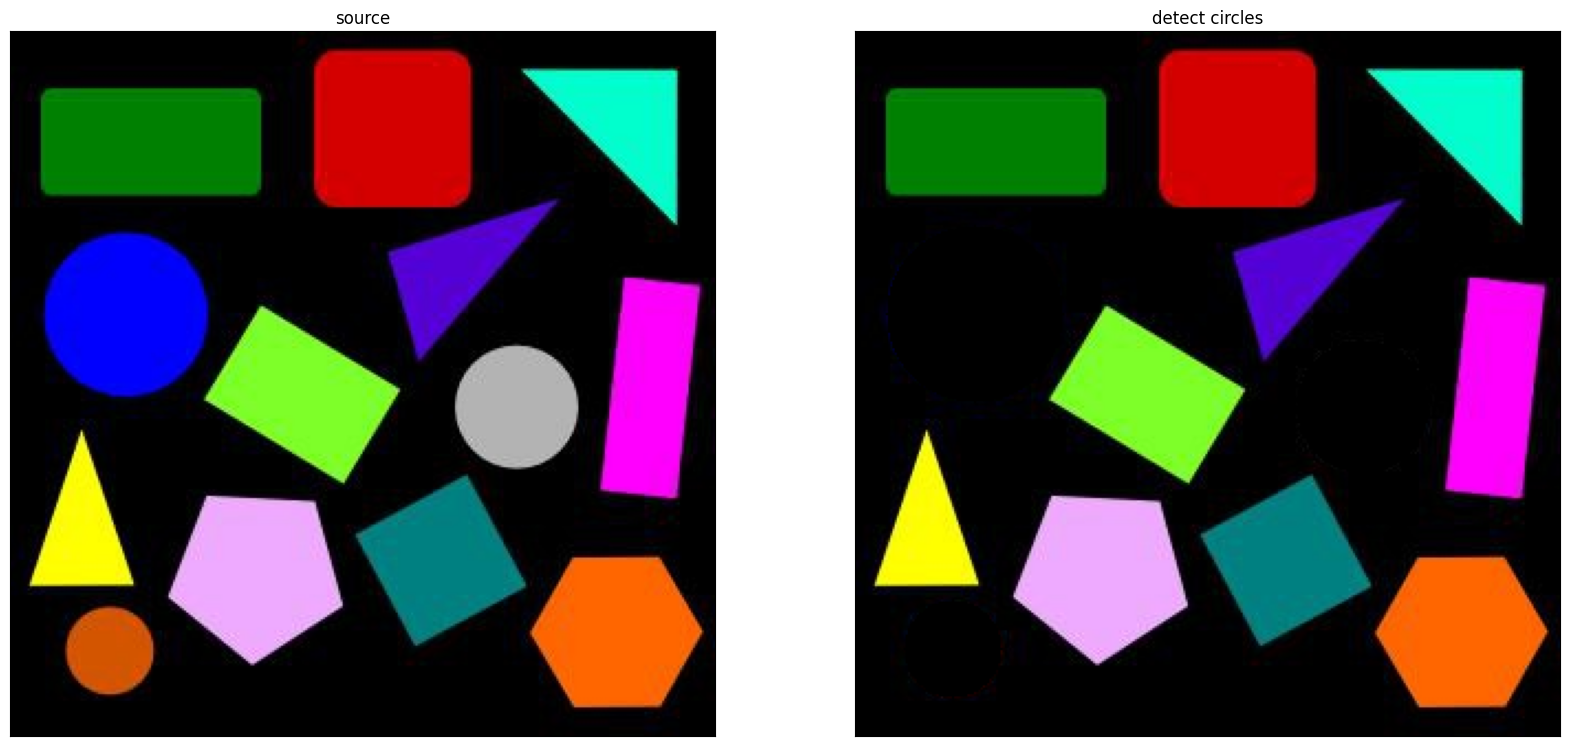

In [44]:
image_list = []

image = cv2.imread("/content/1.jpg")
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img1 = remove_circles(image)

image_list.append([cv2.cvtColor(out_img1, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# part c

Implement this function to detect lines in the given image with hough algorithm.

In [133]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 22, 105, L2gradient=True)

    # Perform Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=2, minLineLength=1, maxLineGap=7)

    # Draw the detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return out_img

Test your implementation (dont change this cell)

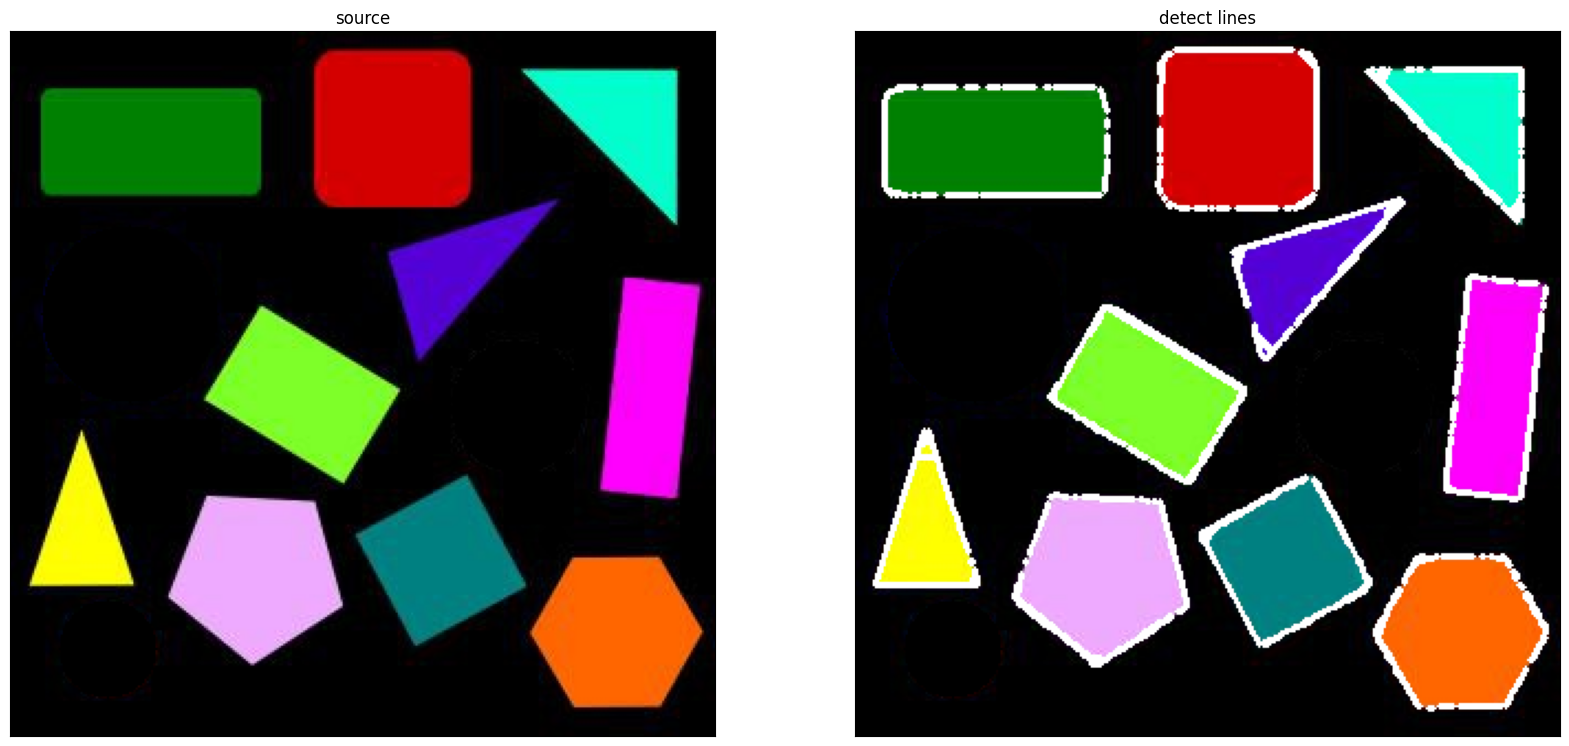

In [134]:
image_list = []

image = out_img1
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# part c extra

In [108]:
def detect_lines_hough(image):
    out_img = image.copy()
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 22, 105, L2gradient=True)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi/180, 30)

    # Iterate over the detected lines
    if lines is not None:
      for line in lines:
          rho, theta = line[0]

          # Convert the line to Cartesian coordinates
          a = np.cos(theta)
          b = np.sin(theta)
          x0 = a*rho
          y0 = b*rho
          x1 = int(x0 + 1000*(-b))
          y1 = int(y0 + 1000*(a))
          x2 = int(x0 - 1000*(-b))
          y2 = int(y0 - 1000*(a))

          # Draw the line on the image
          cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

    return out_img

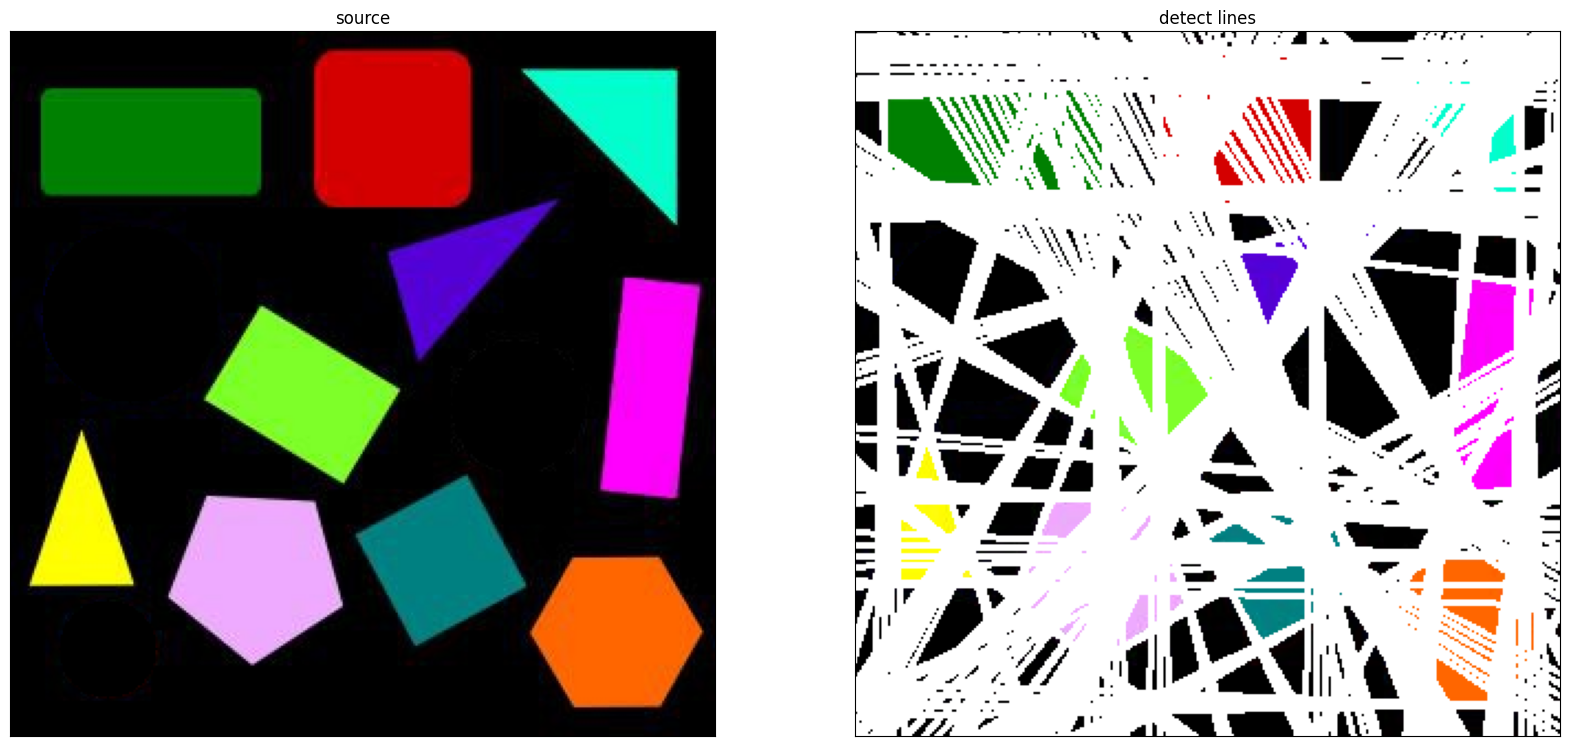

In [109]:
image_list = []

image = out_img1
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b2')

# part d

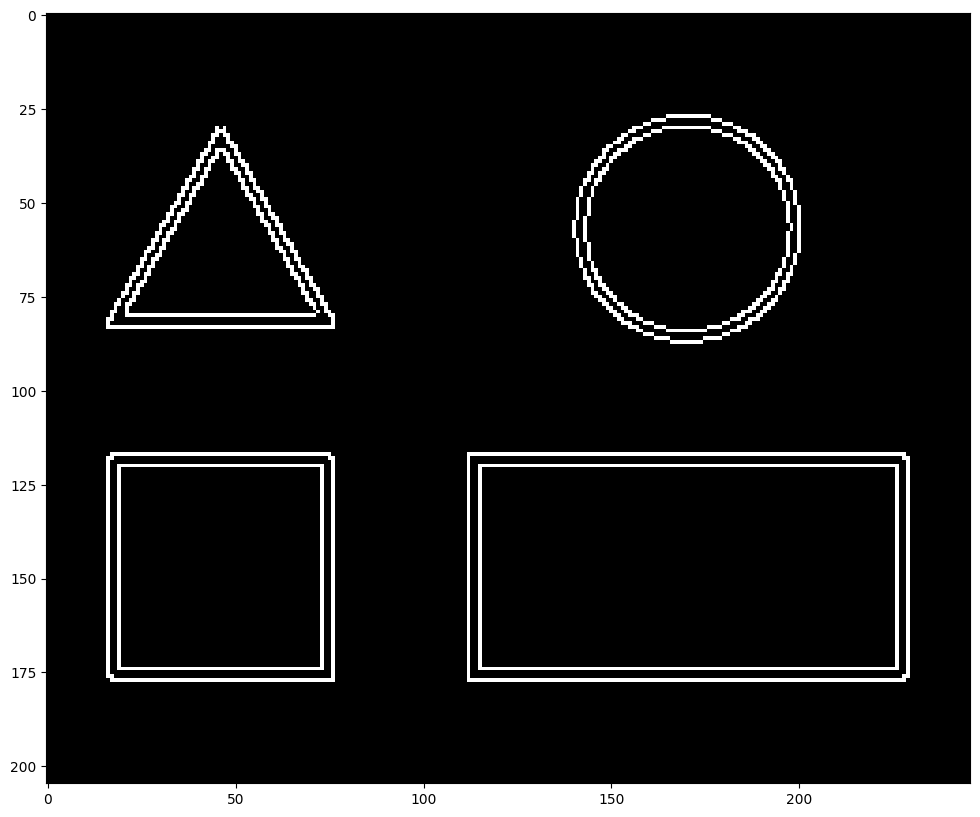

In [112]:
image_d = plt.imread("/content/7.jpg")
# Convert the image to grayscale
gray_d = cv2.cvtColor(image_d, cv2.COLOR_BGR2GRAY)
# Apply Canny edge detection
edges_d = cv2.Canny(gray_d, 50, 150, L2gradient=True)

plt.imshow(edges_d, cmap="gray")

In [135]:
contours, hierarchy = cv2.findContours(edges_d//255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [140]:
def draw_contour(img, contours):
    approximates = []
    # Calculating an approximation of each contour
    for cnt in contours:
        epsilon = 0.03 * cv2.arcLength(cnt, True) # The epsilon parameter controls the approximation accuracy
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        approximates.append(approx)
        cv2.drawContours(img, [approx], 0, (255, 0, 0), 2)
    return img, approximates

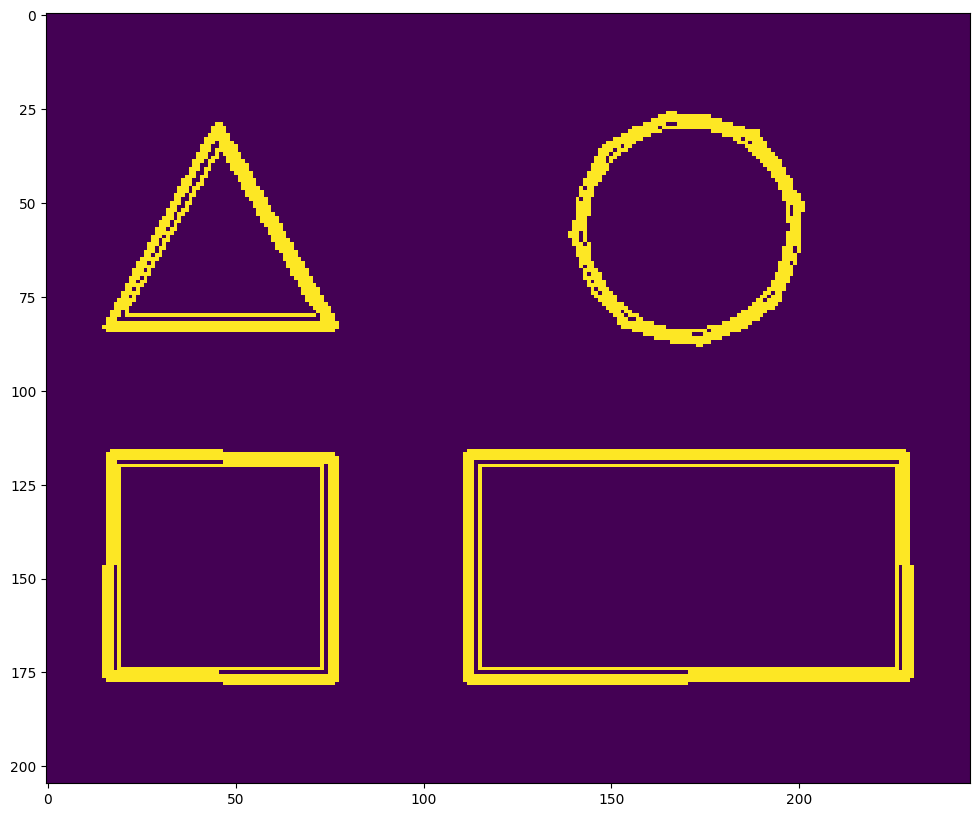

In [141]:
result, approximates = draw_contour(edges_d, contours)
plt.imshow(result)

In [118]:
def classify_shapes(approximates):
    result = []
    for approx in approximates:
        vertice_cnt = len(approx)
        if vertice_cnt == 3:
            shape = "triangle"
        elif vertice_cnt == 4:
            # Cooridinates of the smallest rectangle that covers these points
            x, y, w, h = cv2.boundingRect(approx)
            w2h_ratio = float(w)/h
            if w2h_ratio >= 0.95 and w2h_ratio <= 1.05:
                shape = "square"
            else:
                shape = "rectangle"
        else:
            shape = "circle"
        x,y,w,h = cv2.boundingRect(approx)
        result.append((x,y,shape))
    return result

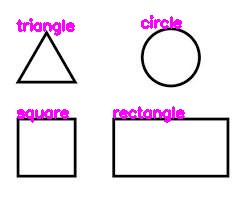

In [137]:
from google.colab.patches import cv2_imshow

result = classify_shapes(approximates)
for item in result:
  x,y,shape = item[0], item[1], item[2]
  cv2.putText(image_d, shape, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)

cv2_imshow(image_d)
cv2.waitKey(0)
cv2.destroyAllWindows()